In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
def load_data(file_path: str) -> pd.DataFrame:
    df = pd.read_csv(file_path, sep=';')
    df.columns = [col.strip().lower() for col in df.columns]
    return df

In [5]:
def eda_summary(df: pd.DataFrame) -> None:
    print("Data Shape:", df.shape)
    print("\nMissing Values:\n", df.isnull().sum())
    print("\nTarget Variable Distribution:\n", df['y'].value_counts(normalize=True))
    print("\nCategorical Features:\n", df.select_dtypes(include='object').columns.tolist())
    print("\nNumerical Features:\n", df.select_dtypes(include='number').columns.tolist())

In [6]:
def plot_categorical_features(df: pd.DataFrame):
    cat_vars = df.select_dtypes(include='object').columns
    for var in cat_vars:
        if var != 'y':
            plt.figure(figsize=(6, 4))
            sns.countplot(data=df, x=var, hue='y')
            plt.title(f"Subscription Rate by {var.capitalize()}")
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

In [7]:
def plot_numerical_features(df: pd.DataFrame):
    num_vars = df.select_dtypes(include='number').columns
    for var in num_vars:
        plt.figure(figsize=(6, 4))
        sns.histplot(data=df, x=var, hue='y', kde=True, bins=30)
        plt.title(f"{var.capitalize()} Distribution by Subscription")
        plt.tight_layout()
        plt.show()

In [8]:
def correlation_with_target(df: pd.DataFrame):
    df_encoded = df.copy()
    df_encoded['y'] = df_encoded['y'].map({'yes': 1, 'no': 0})
    corr = df_encoded.corr(numeric_only=True)['y'].sort_values(ascending=False)
    print("\nCorrelation with target variable:\n", corr)

In [ ]:
df = load_data('../data_input/bank-full.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
eda_summary(df)

Data Shape: (45211, 17)

Missing Values:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Target Variable Distribution:
 y
no     0.883015
yes    0.116985
Name: proportion, dtype: float64

Categorical Features:
 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

Numerical Features:
 ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


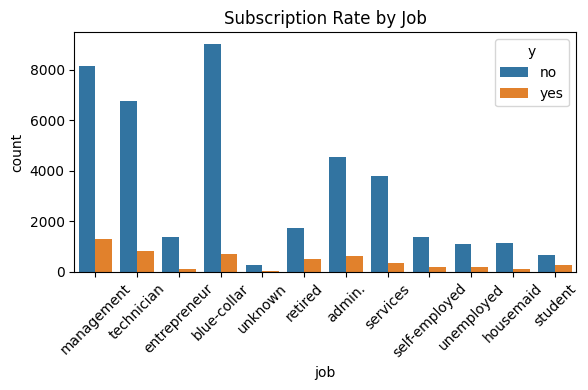

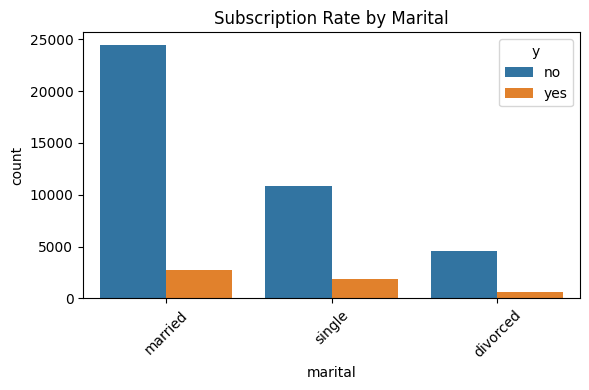

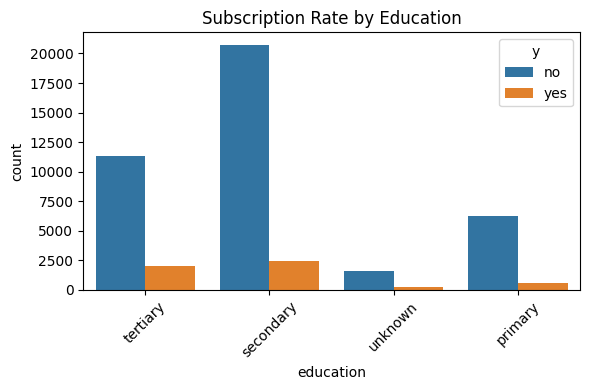

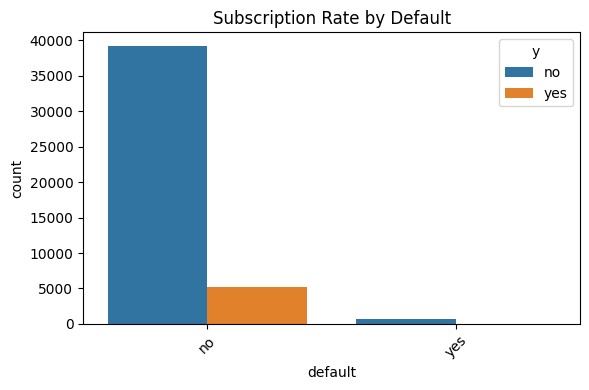

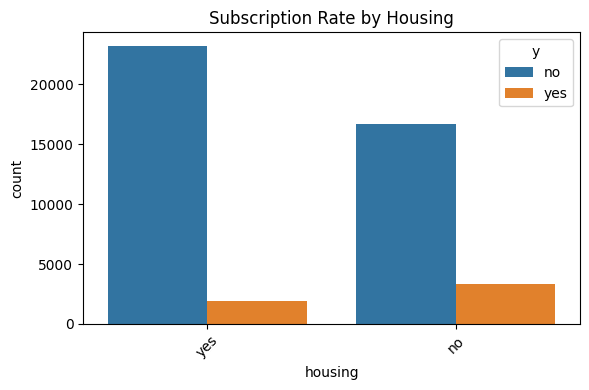

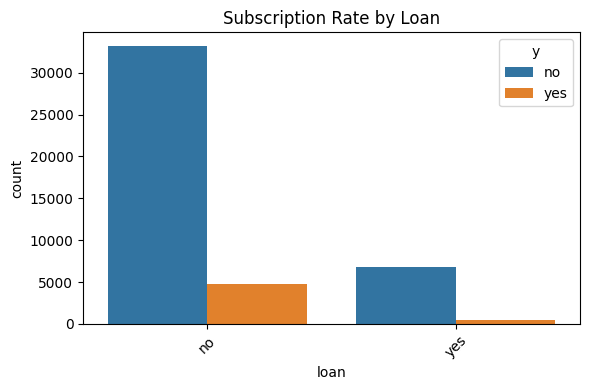

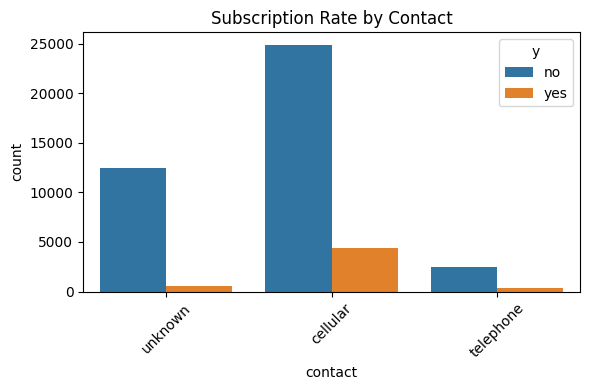

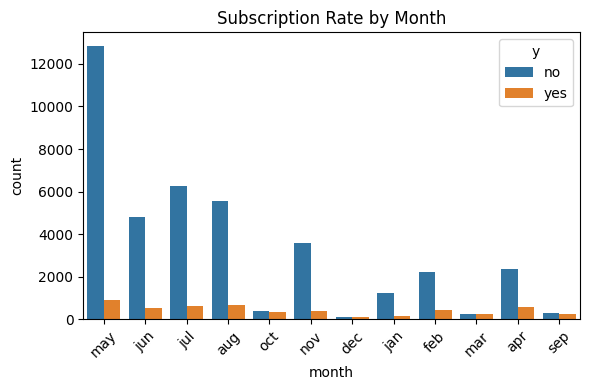

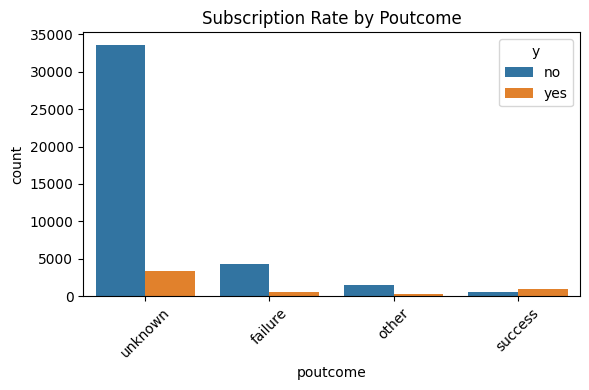

In [12]:
plot_categorical_features(df)

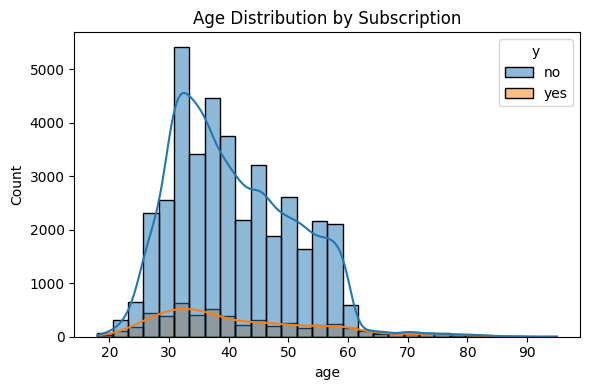

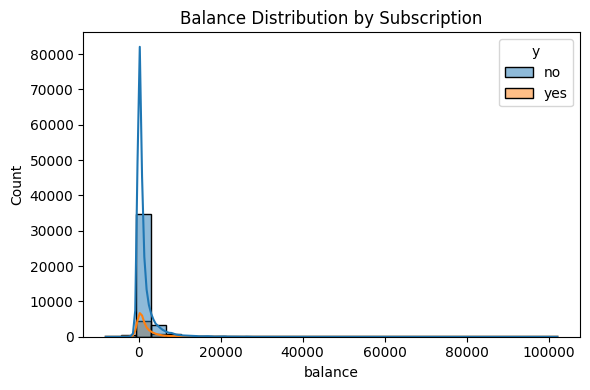

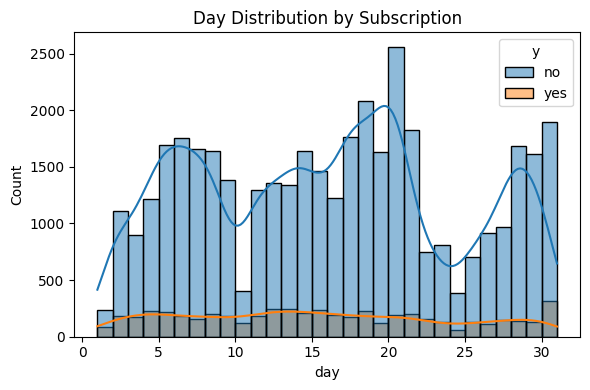

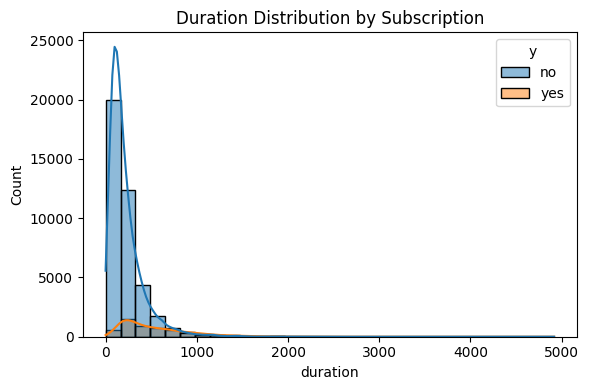

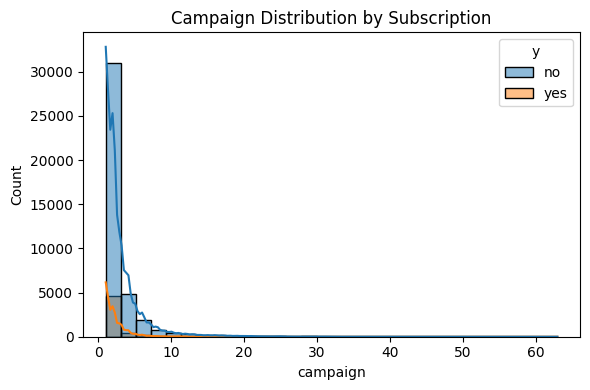

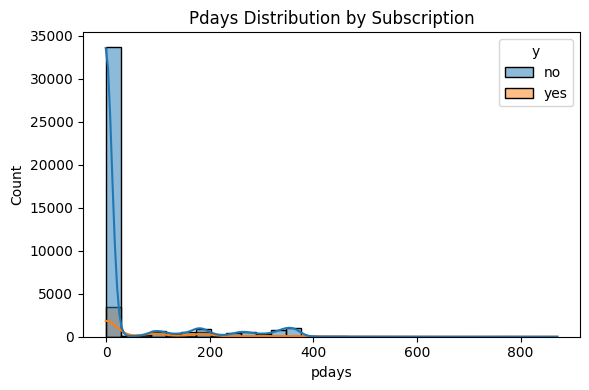

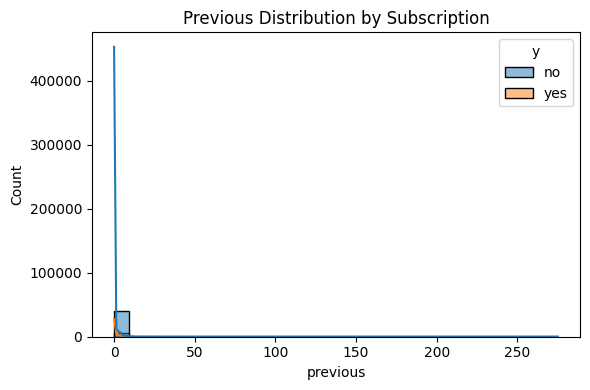

In [13]:
plot_numerical_features(df)


In [14]:
correlation_with_target(df)


Correlation with target variable:
 y           1.000000
duration    0.394521
pdays       0.103621
previous    0.093236
balance     0.052838
age         0.025155
day        -0.028348
campaign   -0.073172
Name: y, dtype: float64
